In [115]:
T = 160000; #時間発展の回数

In [116]:
function pprocess_etas(μ, ε)
    dt = 1 #1時間ステップ
    xs = [0.0]; #初期値、xsは発火時系列
    
    t = 1.0; #時刻
    ts = [1.0]; #イベントの発生した時間の記録

    while t <= T*dt
        t = t + dt;
        m = sum(1/(t-ti) for ti in ts);
        p = 1-exp(-μ*m-ε);
        if rand() <= p
            push!(ts, t)
        end
    end
#    return ts

    i = 1;
    τ_a = [];
    while i <= length(ts) -1
            τ = ts[i+1] - ts[i]
        push!(τ_a, τ); 
        i = i + 1
    end
    
    return sort!(τ_a)
end
    
function pprocess_sml(μ, ε)
    dt = 1 #1時間ステップ
    xs = [0.0]; #初期値、xsは発火時系列
    
    t = 1.0; #時刻
    ts = [1.0]; #イベントの発生した時間の記録
    L = 2
    while t <= T*dt
        t = t + dt;
        if length(ts) > L
            ts_2 = ts[length(ts)-L+1:length(ts)];
            m = sum(1/(t-ti) for ti in ts_2);
        else
            m = sum(1/(t-ti) for ti in ts);
        end
        p = 1-exp(-μ*m-ε);
        if rand() <= p
            push!(ts, t)
        end
    end
#    return ts

    i = 1;
    τ_a = [];
    while i <= length(ts) -1
            τ = ts[i+1] - ts[i]
        push!(τ_a, τ); 
        i = i + 1
    end
    
    return sort!(τ_a)
end

pprocess_sml (generic function with 1 method)

In [117]:
τ = pprocess_etas(0.12,0.006)

70069-element Array{Any,1}:
   1.0
   1.0
   1.0
   1.0
   1.0
   1.0
   1.0
   1.0
   1.0
   1.0
   1.0
   1.0
   1.0
   ⋮  
  88.0
 103.0
 105.0
 118.0
 134.0
 160.0
 222.0
 267.0
 280.0
 312.0
 337.0
 471.0

In [118]:
using PyPlot
ioff() 

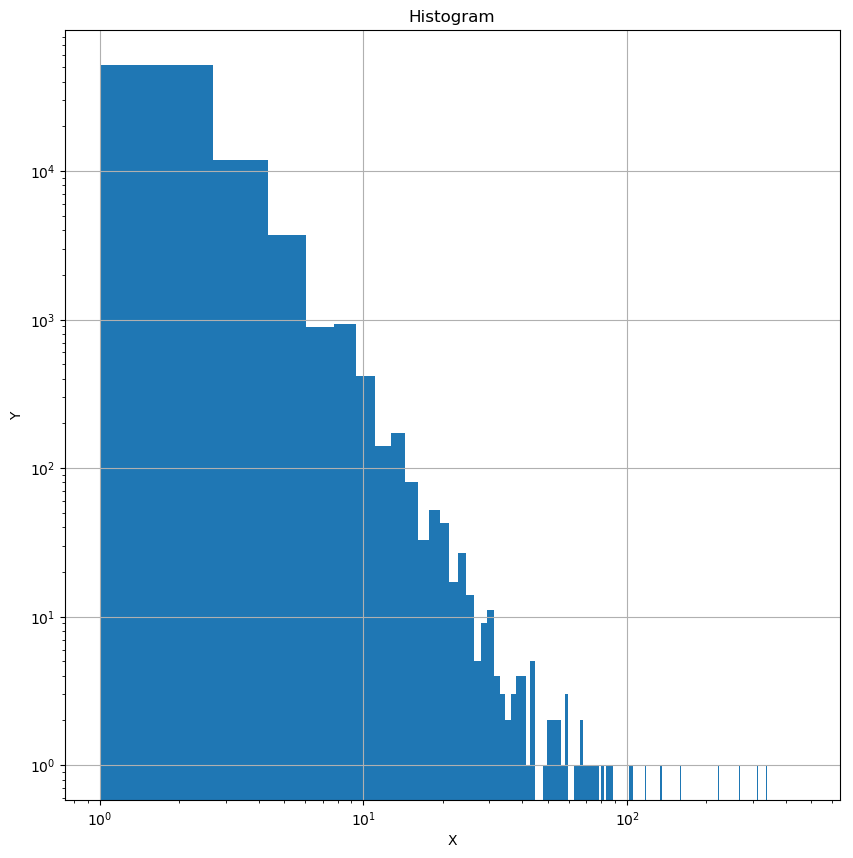

PyObject Text(0.5,1,'Histogram')

In [119]:
##########
#  Plot  #
nbins = 280; # Number of bins

fig = figure("pyplot_histogram",figsize=(10,10)) # Not strictly required
ax = axes() # Not strictly required
h = plt[:hist](τ,nbins) # Histogram

xscale("log")
yscale("log")

#xlim(0,120)
#ylim(0,10^7)

grid("on")
xlabel("X")
ylabel("Y")
title("Histogram")
#gcf() # Needed for IJulia to plot inline

In [120]:
i = 1
expx = []
    while i <= 100
    push!(expx, i); 
        i = i + 1
    end
expx

100-element Array{Any,1}:
   1
   2
   3
   4
   5
   6
   7
   8
   9
  10
  11
  12
  13
   ⋮
  89
  90
  91
  92
  93
  94
  95
  96
  97
  98
  99
 100

In [121]:
expy = 13^5 * exp.(-1 * expx)

100-element Array{Float64,1}:
     1.36591e5  
 50249.0        
 18485.6        
  6800.47       
  2501.75       
   920.343      
   338.575      
   124.555      
    45.8212     
    16.8567     
     6.20122    
     2.2813     
     0.839244   
     ⋮          
     8.27004e-34
     3.04238e-34
     1.11923e-34
     4.11741e-35
     1.51471e-35
     5.57231e-36
     2.04994e-36
     7.5413e-37 
     2.77429e-37
     1.0206e-37 
     3.75459e-38
     1.38124e-38

In [122]:
power_lawy = 12^5 * (expx*1.0).^-3.1

100-element Array{Float64,1}:
 248832.0     
  29021.1     
   8257.15    
   3384.7     
   1694.72    
    963.025   
    597.176   
    394.755   
    274.002   
    197.654   
    147.092   
    112.317   
     87.6359  
      ⋮       
      0.225319
      0.217648
      0.210319
      0.203312
      0.196612
      0.1902  
      0.184062
      0.178183
      0.17255 
      0.16715 
      0.161971
      0.157002

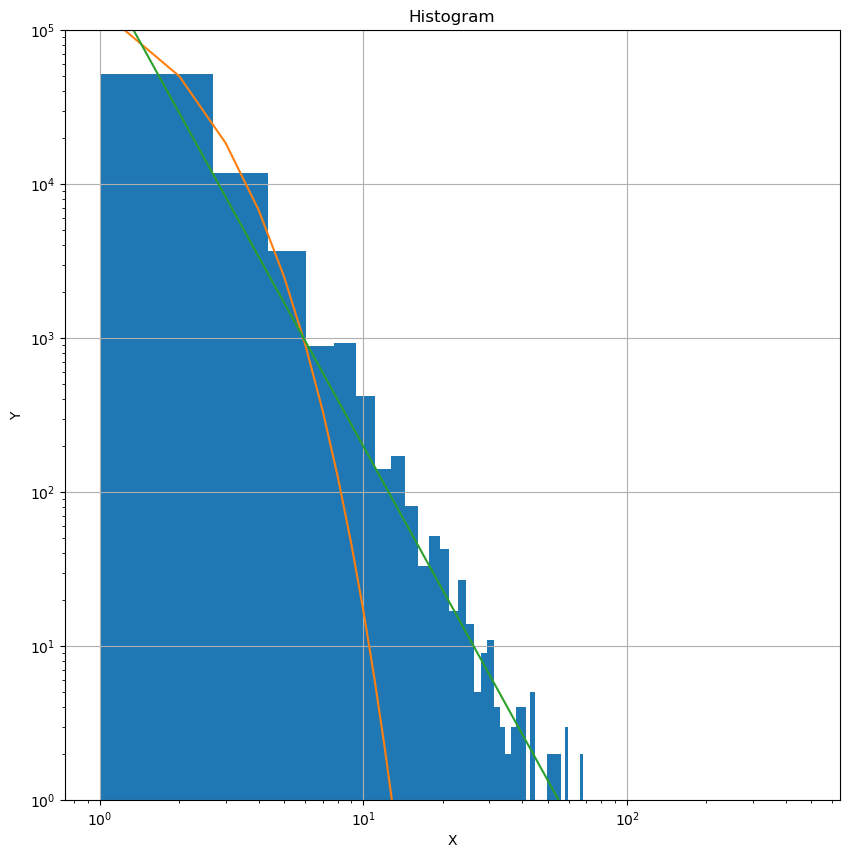

PyObject Text(0.5,1,'Histogram')

In [123]:
##########
#  Plot  #
nbins = 280; # Number of bins

fig = figure("pyplot_histogram",figsize=(10,10)) # Not strictly required
ax = axes() # Not strictly required
h = plt[:hist](τ,nbins) # Histogram
exp_plt = plt[:plot](expx, expy)
power_law_plt = plt[:plot](expx, power_lawy)

xscale("log")
yscale("log")

#xlim(0,120)
ylim(1,10^5)

grid("on")
xlabel("X")
ylabel("Y")
title("Histogram")
#gcf() # Needed for IJulia to plot inline

In [124]:
τ = pprocess_sml(0.12,0.006)

2117-element Array{Any,1}:
    1.0
    1.0
    1.0
    1.0
    1.0
    1.0
    1.0
    1.0
    1.0
    1.0
    1.0
    1.0
    1.0
    ⋮  
  669.0
  697.0
  727.0
  764.0
  782.0
  782.0
  806.0
  823.0
  932.0
 1065.0
 1138.0
 1445.0

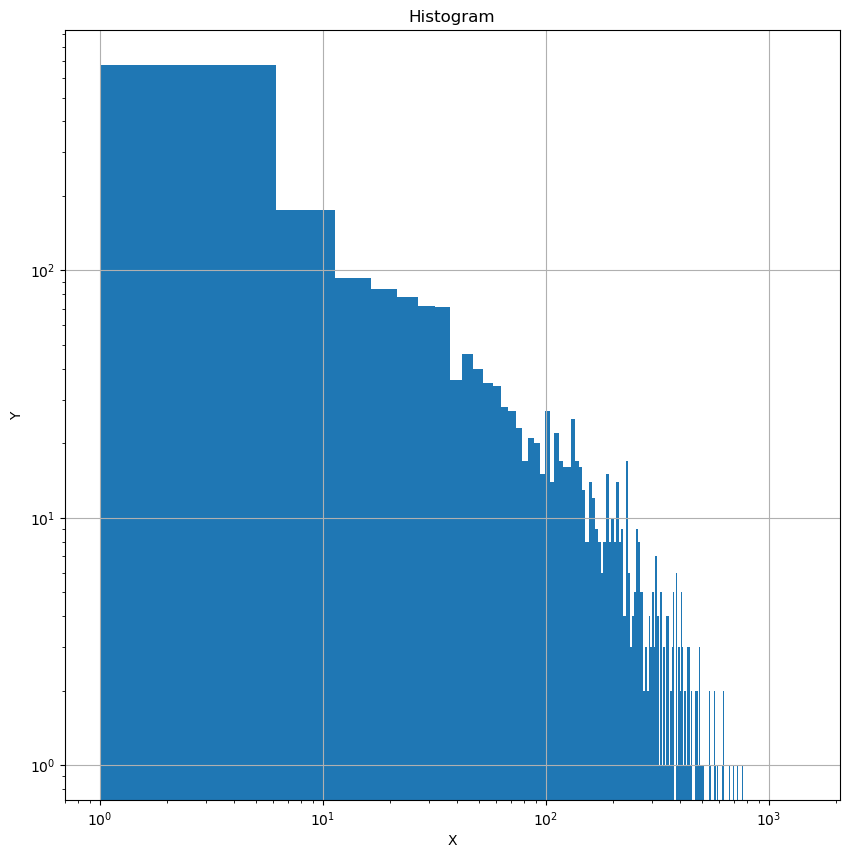

PyObject Text(0.5,1,'Histogram')

In [125]:
##########
#  Plot  #
nbins = 280; # Number of bins

fig = figure("pyplot_histogram",figsize=(10,10)) # Not strictly required
ax = axes() # Not strictly required
h = plt[:hist](τ,nbins) # Histogram

xscale("log")
yscale("log")

#xlim(0,120)
#ylim(0,10^7)

grid("on")
xlabel("X")
ylabel("Y")
title("Histogram")
#gcf() # Needed for IJulia to plot inline

In [151]:
i = 1
expx = []
    while i <= 1000
    push!(expx, i); 
        i = i + 1
    end
expx

1000-element Array{Any,1}:
    1
    2
    3
    4
    5
    6
    7
    8
    9
   10
   11
   12
   13
    ⋮
  989
  990
  991
  992
  993
  994
  995
  996
  997
  998
  999
 1000

In [162]:
expy = 10^3 * exp.(-0.1 * expx)

1000-element Array{Float64,1}:
 904.837      
 818.731      
 740.818      
 670.32       
 606.531      
 548.812      
 496.585      
 449.329      
 406.57       
 367.879      
 332.871      
 301.194      
 272.532      
   ⋮          
   1.11757e-40
   1.01122e-40
   9.14991e-41
   8.27918e-41
   7.49131e-41
   6.77842e-41
   6.13337e-41
   5.5497e-41 
   5.02158e-41
   4.54371e-41
   4.11132e-41
   3.72008e-41

In [163]:
power_lawy = 10^3 * (expx*1.0).^-1

1000-element Array{Float64,1}:
 1000.0    
  500.0    
  333.333  
  250.0    
  200.0    
  166.667  
  142.857  
  125.0    
  111.111  
  100.0    
   90.9091 
   83.3333 
   76.9231 
    ⋮      
    1.01112
    1.0101 
    1.00908
    1.00806
    1.00705
    1.00604
    1.00503
    1.00402
    1.00301
    1.002  
    1.001  
    1.0    

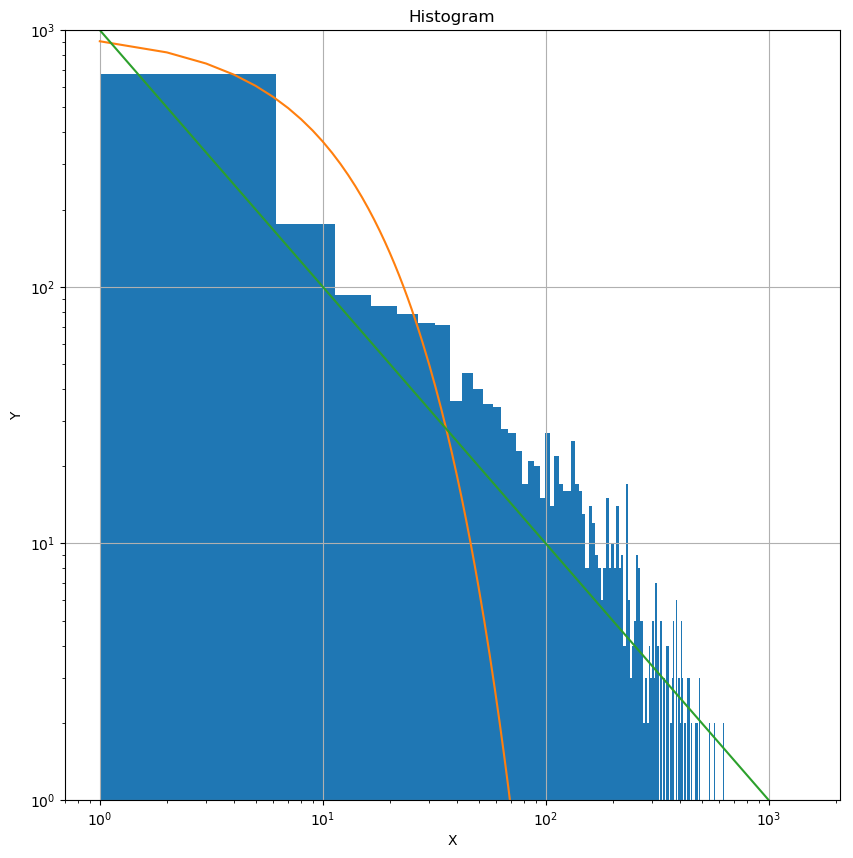

PyObject Text(0.5,1,'Histogram')

In [164]:
##########
#  Plot  #
nbins = 280; # Number of bins

fig = figure("pyplot_histogram",figsize=(10,10)) # Not strictly required
ax = axes() # Not strictly required
h = plt[:hist](τ,nbins) # Histogram
exp_plt = plt[:plot](expx, expy)
power_law_plt = plt[:plot](expx, power_lawy)

xscale("log")
yscale("log")

#xlim(0,120)
ylim(1,10^3)

grid("on")
xlabel("X")
ylabel("Y")
title("Histogram")
#gcf() # Needed for IJulia to plot inline